In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
# EDA

In [ ]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [ ]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [ ]:
X.pivot_table(index = 'workclass', columns = 'education', values = 'age', aggfunc = 'mean')

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
workclass,,,,,,,,,,,,,,,,
?,33.980000,32.372881,30.975000,63.833333,53.966667,56.111111,47.196078,40.978723,45.491803,46.445087,63.600000,45.469925,53.770833,54.80,63.555556,31.196498
Federal-gov,50.533333,38.857143,34.750000,63.000000,35.000000,54.000000,41.666667,40.925926,40.213115,41.594249,47.272727,43.288608,45.545455,NaN,41.421053,42.195592
Local-gov,45.326923,35.590164,38.600000,59.600000,53.384615,55.450000,48.774194,39.612403,41.209677,38.762857,51.085714,42.844941,44.969582,44.75,44.731707,39.162988
Never-worked,17.500000,17.666667,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,19.000000
Private,36.471624,31.081445,31.478516,43.645320,41.469438,46.080128,39.218310,36.301382,37.316532,37.270979,45.167300,37.397535,42.376453,40.00,41.595568,34.498208
Self-emp-inc,49.962963,44.913043,42.692308,53.000000,56.625000,54.400000,47.461538,42.327586,45.271186,45.339713,49.309091,44.579812,47.642857,NaN,48.720930,45.262048
Self-emp-not-inc,45.211538,41.773585,41.300000,56.125000,49.151515,55.869565,44.491525,43.288288,41.356725,44.622735,48.776316,44.915559,48.758454,55.60,48.331633,44.045580
State-gov,43.789474,34.400000,35.181818,72.500000,38.000000,56.437500,48.400000,37.365079,40.066667,38.552204,47.696000,41.183133,41.691120,31.00,43.977778,34.732653
Without-pay,NaN,NaN,NaN,NaN,NaN,69.500000,NaN,56.500000,NaN,NaN,NaN,41.571429,NaN,NaN,NaN,53.000000


In [ ]:
X.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [ ]:
X.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States


In [ ]:
df = X.dropna()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


<Axes: xlabel='workclass', ylabel='age'>

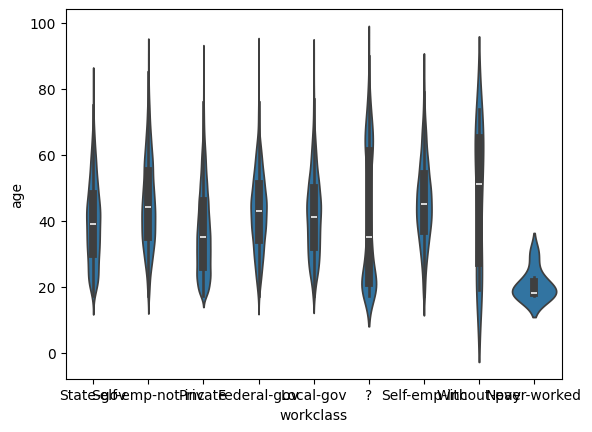

In [ ]:
sns.violinplot(data = df, x = 'workclass', y = 'age')

<Axes: >

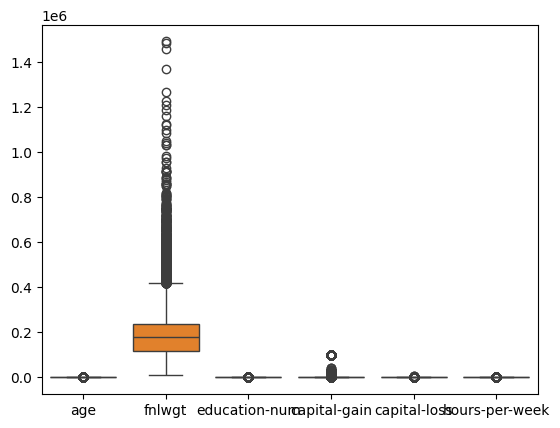

In [ ]:
sns.boxplot(data = df)

In [ ]:
df['age'].median()

37.0

In [ ]:

def outlier_detection(df, feature):
    lq = df[feature].quantile(0.25)
    uq = df[feature].quantile(0.75)
    iqr = uq - lq
    lower_bound = lq - (1.5 * iqr)
    upper_bound = uq + (1.5 * iqr)

    # Calculate median
    median = df[feature].median()

    # Replace outliers with median
    df.loc[df[feature] < lower_bound, feature] = median
    df.loc[df[feature] > upper_bound, feature] = median

    return df

# Example usage:
# X = outlier_detection(X, 'your_feature_column')
# Then plot the updated data


<Axes: >

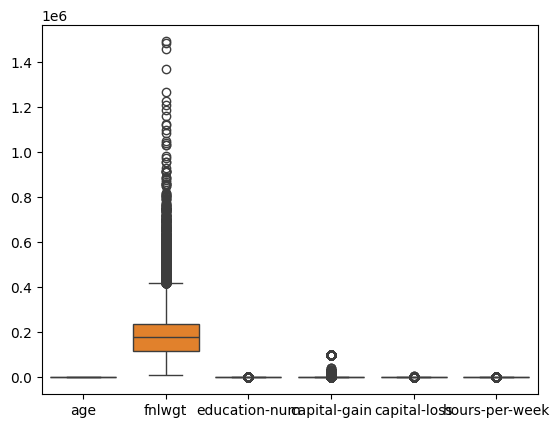

In [ ]:
sns.boxplot(data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x7da95b415db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7da95b4162f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7da95b414a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7da95b416830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7da95b416ad0>],
 'means': []}

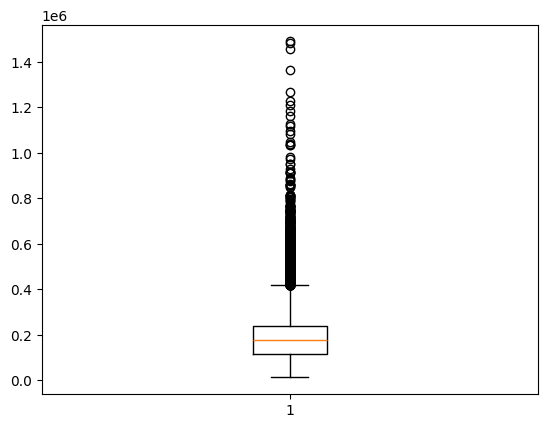

In [ ]:
plt.boxplot(X['fnlwgt'])